1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues 
 eigendecomposition:  [ 2.68459786e+01 -9.45980269e-16  2.02540235e+00]
SVD: [2.68459786e+01 2.02540235e+00 1.14320703e-30]
Eigenvectors (rows) 
 eigendecomposition: [[-0.11606365 -0.57660787 -0.80873518]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56556393 -0.7077123   0.42341557]]
SVD: [[-0.11606365 -0.57660787 -0.80873518]
 [ 0.56556393 -0.7077123   0.42341557]
 [-0.81649658 -0.40824829  0.40824829]]
Apart from the decrescent reordering of eigenvalues, the results yielded by the two different methods are compatible: the main difference lies in the smallest eigenvalue. For such small numbers some fluctuation due to different calculation methods have to be taken into account.
The principal component [-0.11606365 -0.57660787 -0.80873518] explains  0.9298474032433512  of the total dataset's variability, [ 0.56556393 -0.7077123   0.42341557]  the  0.07015259675664959 and  [-0.81649658 -0.40824829  0.40824829]  the  3.9596548301701556e-32
Indeed, given how the dataset was con

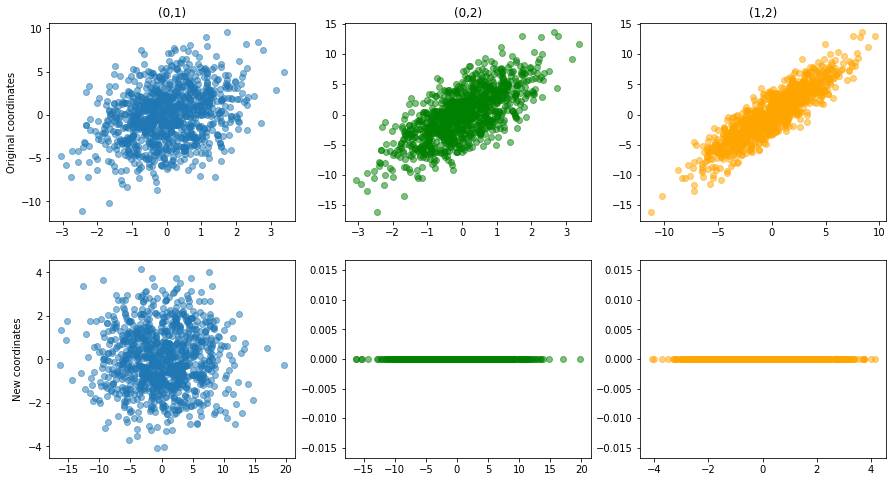

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#generating the dataset
N = 1000 #number of entries
x1 = np.random.normal(0.0, 1.0, N)
x2 = x1 + np.random.normal(0.0, 3.0, N)
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])

#finding eigenvectors and eigenvalues of the covariance matrix
covM = np.dot(X, X.T)/(N-1) #formula for data with zero mean
total_variability = covM.trace() #invariant
l, V = np.linalg.eig(covM)
    
#finding eigenvectors and eigenvalues using SVD
U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(N-1)
V_svd = U.T
    
print ("Eigenvalues \n eigendecomposition: ", l)
print ("SVD:",l_svd)
print ("Eigenvectors (rows) \n eigendecomposition:",V.T)
print ("SVD:",V_svd)

print("Apart from the decrescent reordering of eigenvalues, the results yielded by the two different methods are compatible: the main difference lies in the smallest eigenvalue. For such small numbers some fluctuation due to different calculation methods have to be taken into account.")

#What percent of the total dataset's variability is explained by the principal components? 
print("The principal component", V_svd[0, :],"explains ", l_svd[0]/total_variability, " of the total dataset's variability,", V_svd[1,:]," the ", l_svd[1]/total_variability, "and ", V_svd[2,:]," the ", l_svd[2]/total_variability)

#Given how the dataset was constructed, do these make sense?
print("Indeed, given how the dataset was constructed these results make sense: the third feature was associated to the greatest standard deviation and this is the component with the most weight in the eigenvector associated to the biggest eigenvalue. Instead, the first variable is the one with the smaller standard deviation, and so it is preponderant in the eigenvector associated to the smaller eigenvalue.")

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
print("It is possible to reduce the dimensionality of the sistem projecting to the space of the first two eigenvectors, wich retain >99% of the total varibility.")
Xp = np.dot(V_svd, X) #rotation: change of base
X_reduced = np.array([Xp[0, :], Xp[1, :]]) #reduced data: only 2 components, associated to the greater variability.

#Plot the data points in the original and the new coordiantes as a set of scatter plots. Your 
#final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
original01 = ax1.scatter(X[0, :], X[1,:], alpha=0.5)
original02 = ax2.scatter(X[0, :], X[2,:], alpha=0.5, color='green')
original12 = ax3.scatter(X[1, :], X[2,:], alpha=0.5, color='orange')
new01 = ax4.scatter(Xp[0, :], Xp[1,:], alpha=0.5)
new02 = ax5.scatter(Xp[0, :], Xp[2,:], alpha=0.5, color='green')
new12 = ax6.scatter(Xp[1, :], Xp[2,:], alpha=0.5, color='orange')
row1 = ax1.set_ylabel("Original coordinates")
row2 = ax4.set_ylabel("New coordinates")
column1 = ax1.set_title('(0,1)')
column2 = ax2.set_title('(0,2)')
column3 = ax3.set_title('(1,2)')

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The biggest eigenvalue( 26.845980153536427 ) retaines  0.9298079435937683  of the total variability. 
 The correspective eigenvector is  [-1.16063652e-01 -5.76607854e-01 -8.08735157e-01 -6.85737542e-05
 -2.07752457e-05 -1.59528514e-04 -2.40813480e-05 -1.50930485e-05
 -1.28564271e-04  8.86510745e-05  2.17361547e-05 -1.09692995e-05
  4.63636016e-06] . 
 Both the variability of the eigenvalue and the main component of the eigenvector are the same as before.
As seen in the graphs below, the PCA procedures, with and without the noise, lead to the same results.


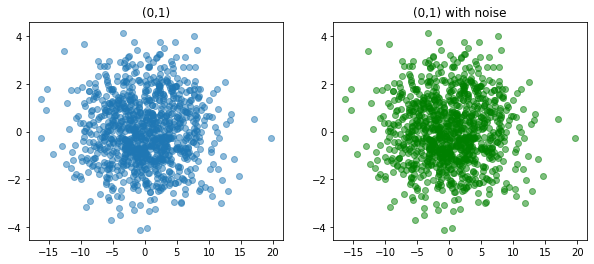

In [2]:
#generating noise
noise = np.zeros((10,N))
sigmas = np.random.random(10)/50.0
for i in range(0,10,1):
    noise[i,:] = np.random.normal(0.0, sigmas[i], N)
X_2 = np.append(X, noise, axis=0)

#PCA procedure
U_2, spectrum_2, Vt_2 = np.linalg.svd(X_2)
l_2 = spectrum_2**2/(N-1)
V_2 = U_2.T
total_var2 = np.sum(l_2)
print("The biggest eigenvalue(", l_2[0],") retaines ", l_2[0]/total_var2, " of the total variability. \n The correspective eigenvector is ", V_2[0,:],". \n Both the variability of the eigenvalue and the main component of the eigenvector are the same as before.")
Xp_2 = np.dot(V_2, X_2)
print("As seen in the graphs below, the PCA procedures, with and without the noise, lead to the same results.")
#Showing the graph with the change of coordinates
fig_2, (ax7, ax8) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
new_1 = ax7.scatter(Xp[0, :], Xp[1,:], alpha=0.5)
new_2 = ax8.scatter(Xp_2[0, :], Xp_2[1,:], alpha=0.5, color='green')
column1 = ax7.set_title('(0,1)')
column2 = ax8.set_title('(0,1) with noise')

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [4]:
#!cat /home/noemi/data/magic04.names.1

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

(10, 12332)
eigenvalues [4.43093756e+04 1.70098497e+03 1.13281496e+03 5.39824712e+02
 2.98430670e+02 1.83691519e+02 4.21920805e+01 3.17764138e-01
 2.12490200e-02 3.41584285e-04] 
 corresponding variability [9.19135698e-01 3.52845418e-02 2.34986537e-02 1.11979047e-02
 6.19052466e-03 3.81042230e-03 8.75215390e-04 6.59157028e-06
 4.40781044e-07 7.08568574e-09]
The dimensionality can be reduced from 10 to 4, still explaining 98.9% of the total dataset variability, projecting on the span of the first 4 eigenvectors: [-2.23372019e-01 -8.95328687e-02 -1.28147991e-02 -1.58926016e-03
 -8.90463259e-04 -3.63442171e-03 -9.97540687e-02 -1.09777178e-03
 -6.87670106e-02 -9.62926310e-01] [-8.35657142e-02 -4.69724115e-02 -4.56349575e-03  5.36056184e-04
  3.24832865e-04 -9.02929436e-01 -4.12167384e-01  5.66658252e-04
  3.24954080e-02  6.75969918e-02] [-0.36131823 -0.05812324  0.00257945  0.00431132  0.0024478   0.40247353
 -0.75149499 -0.00479229  0.3456205   0.14083127] [-4.13512875e-02 -8.56136365e-02

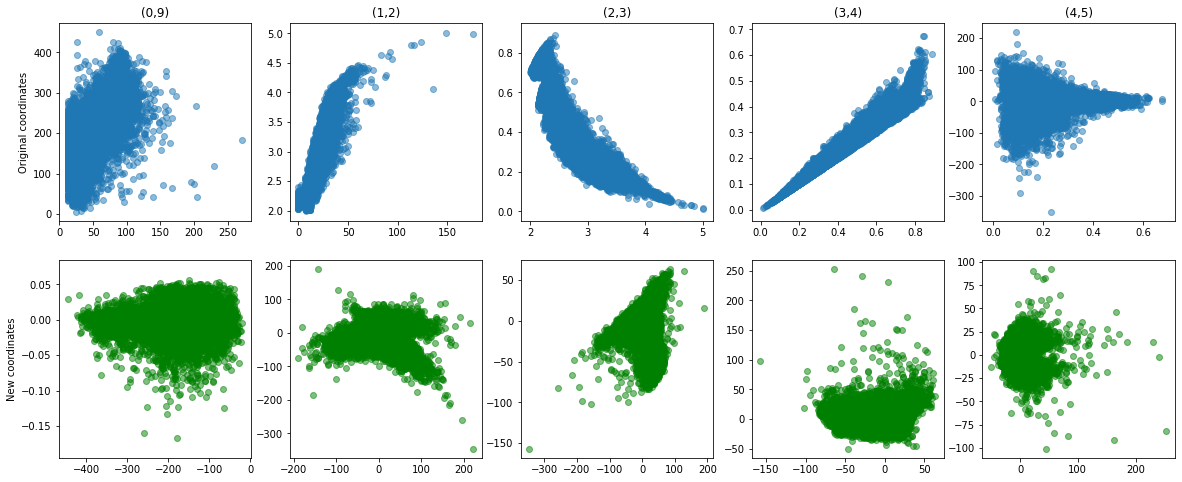

In [5]:
#loading the dataset
signal = 12332
with open('/home/noemi/data/magic04.data.1') as frM:
    #properly loading data: by rows, splitting numbers and then building a matrix
    rows = np.array([r.strip(",g\n") for r in frM])
    lines = np.array([r.split(",") for r in rows])
    X_magic = np.array([[float(lines[i][j]) for i in range(0,signal,1)] for j in range(0,10,1)]) #keeping only the signa

print(np.shape(X_magic)) #to check that the array is properly filled

#PCA
U_magic, spectrum_magic, Vt_magic = np.linalg.svd(X_magic)
l_magic = spectrum_magic**2/(signal-1)
V_magic = U_magic.T
total_varMagic = np.sum(l_magic)
print("eigenvalues", l_magic, "\n corresponding variability", l_magic/total_varMagic)
print("The dimensionality can be reduced from 10 to 4, still explaining 98.9% of the total dataset variability, projecting on the span of the first 4 eigenvectors:", V_magic[0], V_magic[1], V_magic[2], V_magic[3])
Xp_magic = np.dot(V_magic, X_magic)
print("So the principal components are: the distance from origin to center of ellipse (feature nr.10), distance from highest pixel to center projected onto major axis (nr.6), major axis of ellipse (nr.1) and angle of major axis with vector to origin (nr.9)")

#Showing the graph with the change of coordinates
fig_magic, ((ax9, ax10, ax11, ax12, ax13), (ax14, ax15, ax16, ax17, ax18)) = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
new_9m = ax9.scatter(X_magic[0, :], X_magic[9,:], alpha=0.5)
new_10m = ax10.scatter(X_magic[1, :], X_magic[2,:], alpha=0.5)
new_11m = ax11.scatter(X_magic[2, :], X_magic[3,:], alpha=0.5)
new_12m = ax12.scatter(X_magic[3, :], X_magic[4,:], alpha=0.5)
new_13m = ax13.scatter(X_magic[4, :], X_magic[5,:], alpha=0.5)
new_2m = ax14.scatter(Xp_magic[0, :], Xp_magic[9,:], alpha=0.5, color='green')
new_15m = ax15.scatter(Xp_magic[1, :], Xp_magic[2,:], alpha=0.5, color='green')
new_16m = ax16.scatter(Xp_magic[2, :], Xp_magic[3,:], alpha=0.5, color='green')
new_17m = ax17.scatter(Xp_magic[3, :], Xp_magic[4,:], alpha=0.5, color='green')
new_18m = ax18.scatter(Xp_magic[4, :], Xp_magic[5,:], alpha=0.5, color='green')
column1m = ax9.set_title('(0,9)')
column10m = ax10.set_title('(1,2)')
column11m = ax11.set_title('(2,3)')
column12m = ax12.set_title('(3,4)')
column13m = ax13.set_title('(4,5)')
row1 = ax9.set_ylabel("Original coordinates")
row2 = ax14.set_ylabel("New coordinates")